In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from src import AcFCM

In [22]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

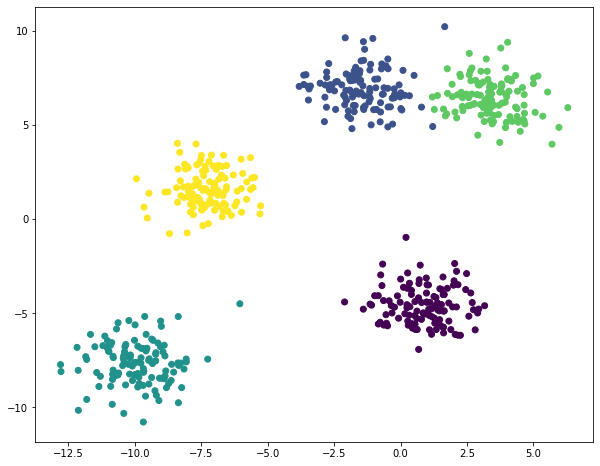

In [23]:
X, y = make_blobs(n_samples=600, centers=5, cluster_std=1, random_state=100)
plot_datapoints(X, y)

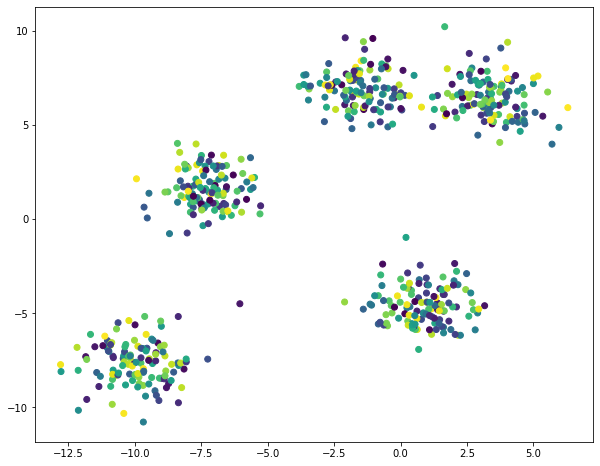

0) J_fcm: 578.9720356508589, V_XB: 19375.186322905287
1) J_fcm: 366.105059916447, V_XB: 6566.013512241844
2) J_fcm: 363.2998094650709, V_XB: 2648.2466121088173
3) J_fcm: 345.95230465295845, V_XB: 918.8135587591627
4) J_fcm: 293.827083950876, V_XB: 210.40999728817658
5) J_fcm: 216.31691035330223, V_XB: 278.183409329219
6) J_fcm: 123.98374318536217, V_XB: 335.6279209621626
7) J_fcm: 76.42823376233659, V_XB: 1719.7096791193087
8) J_fcm: 58.26043621015774, V_XB: 718.2187802293403
9) J_fcm: 48.580396871533004, V_XB: 86.92551721280128
10) J_fcm: 41.818532213525884, V_XB: 20.161513619841788
11) J_fcm: 37.94831708688361, V_XB: 6.095917944213966
12) J_fcm: 35.77701312873785, V_XB: 1.7493854772291508
13) J_fcm: 34.10809503378728, V_XB: 1.261965891437186
14) J_fcm: 32.9447563975274, V_XB: 0.8769229343179453
15) J_fcm: 32.05136927945584, V_XB: 0.8545077655221093
16) J_fcm: 31.425188213941198, V_XB: 0.8421021455229922
17) J_fcm: 31.049395167785217, V_XB: 0.8343847950047347
18) J_fcm: 30.73221442389

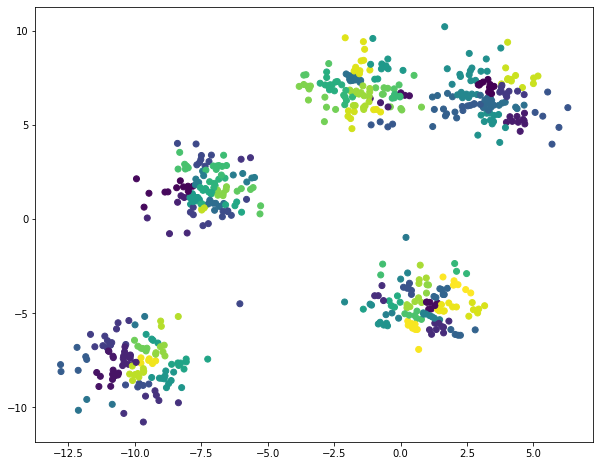

In [24]:
ac_fcm = AcFCM(X, 100)
plot_datapoints(X, np.argmax(ac_fcm.run(0)[0], axis=1))
plot_datapoints(X, np.argmax(ac_fcm.run()[0], axis=1))

Current V_XB = 0.3294411322600624, old V_XB = 0.1782183522635693, clusters = 66


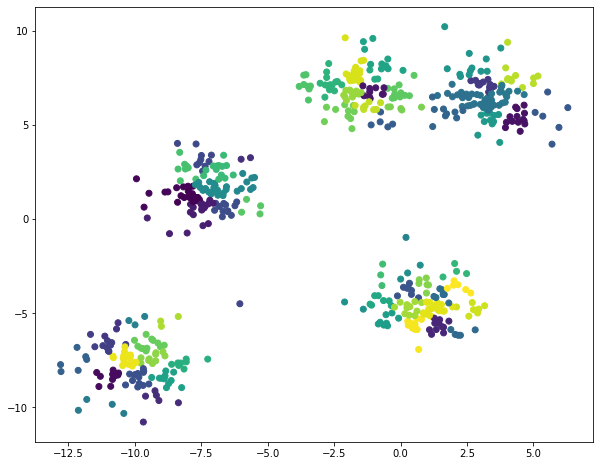

In [29]:
old_V_XB = ac_fcm.get_v_xb()

while ac_fcm.c > 2:
    old_U, old_V = ac_fcm.U, ac_fcm.V
    ac_fcm.U, ac_fcm.V = ac_fcm.absorbtive_criteria()
    ac_fcm.run(logs_enabled=False)

    V_XB = ac_fcm.get_v_xb(c=ac_fcm.c-1)
    print(f'Current V_XB = {V_XB}, old V_XB = {old_V_XB}, clusters = {ac_fcm.c}')
    if V_XB > old_V_XB+1e-1:
        ac_fcm.U, ac_fcm.V = old_U, old_V
        break

    ac_fcm.c -= 1
    old_V_XB = V_XB

plot_datapoints(X, np.argmax(ac_fcm.run(0)[0], axis=1))